In [59]:
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import numpy as np
import matplotlib.pyplot as plt
import pygrib # import pygrib interface to grib_api
import glob
import pandas as pd
from matplotlib.dates import  DateFormatter
from reader import read_coordinates, read_variable, read_dates
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import  DateFormatter

In [16]:
# Get coordinates 
lats, lons = read_coordinates()

In [92]:
# Define basemap projection
# m = Basemap(projection='nsper',lon_0=-25, lat_0=25,resolution='c',satellite_height=20000000)
m = Basemap(projection='moll',lon_0=0,resolution='c')
x, y = m(lons,lats)

In [32]:
# Get files list
main_folder='/scratch/local1/m300382/icon_eps/'
file_prefix='icon-eps_global_icosahedral'
level_type='single-level'
run=''

t2m = read_variable(variable='t_2m')
time= read_dates()
t2m = t2m-273.15

u10m = read_variable(variable='u_10m')
v10m = read_variable(variable='v_10m')
wind_speed=np.sqrt(u10m**2+v10m**2)*3.6

tot_prec = read_variable(variable='tot_prec')

In [64]:
# Compute statistics 
t2_mean=t2_ens.mean(axis=1)
t2_std=t2_ens.std(axis=1)

In [ ]:
# Mosaico 
fig = plt.figure(figsize=(20,16))

x, y = m(lons,lats)
for nens in range(1,t2_ens.shape[1]):
    ax = plt.subplot(4,5,nens)
    m.drawcoastlines()
    cs = m.contourf(x, y, t2_ens[0,nens,:,:], np.linspace(t2_ens.min(),t2_ens.max(),50),
                    cmap=plt.cm.jet, extend='both')
    t = plt.title('ens member %s' % nens)

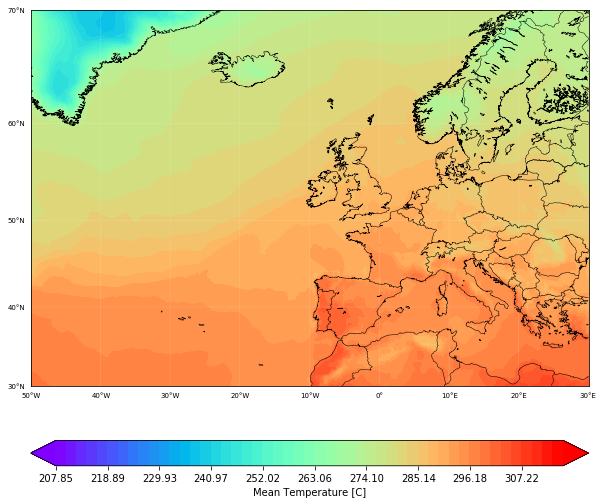

In [110]:
fig = plt.figure(figsize=(10,10))

m = Basemap(projection='mill', llcrnrlon=-50, llcrnrlat=30, urcrnrlon=30, urcrnrlat=70,resolution='i')
x, y = m(lons,lats)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='black')
m.drawcountries(linewidth=0.5, linestyle='solid', color='black')
m.drawparallels(np.arange(-90.0, 90.0, 10.), linewidth=0.2, color='white',
                labels=[True, False, False, True], fontsize=7)
m.drawmeridians(np.arange(0.0, 360.0, 10.), linewidth=0.2, color='white',
                labels=[True, False, False, True], fontsize=7)

levels=np.linspace(t2_mean.min(), t2_mean.max(), 50)
cs = plt.tricontourf(x, y, t2_mean[1,:], extend='both', cmap='rainbow', levels=levels)
plt.colorbar(orientation='horizontal', label='Mean Temperature [C]', pad=0.1, fraction=0.05)

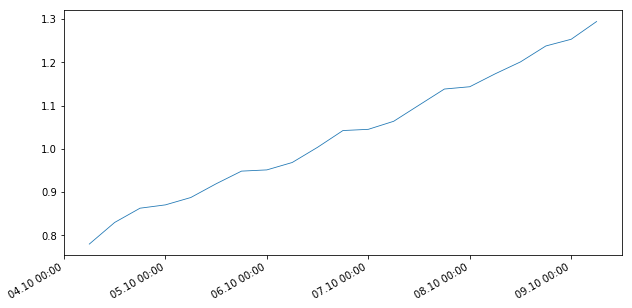

In [70]:
fig = plt.figure(figsize=(10,5))

plt.plot_date(time, t2_std.mean(axis=(1)), '-',linewidth=0.8)
fig.autofmt_xdate()
plt.gca().xaxis.set_major_formatter(DateFormatter('%d.%m %H:%M'))
plt.show()

In [33]:
from geopy.geocoders import Nominatim

cities = ["Hamburg"]

t_2m_point={}
tot_prec_point={}
wind_speed_10m_point={}

geolocator = Nominatim()
for city in cities:
    loc = geolocator.geocode(city)
    distance = np.sqrt((lats-loc.latitude)**2+(lons-loc.longitude)**2)
    ncell = np.argmin(distance)

    t_2m_point[city] = t2m[:,:,ncell]
    tot_prec_point[city] = tot_prec[:,:,ncell]
    wind_speed_10m_point[city] = wind_speed[:,:,ncell]

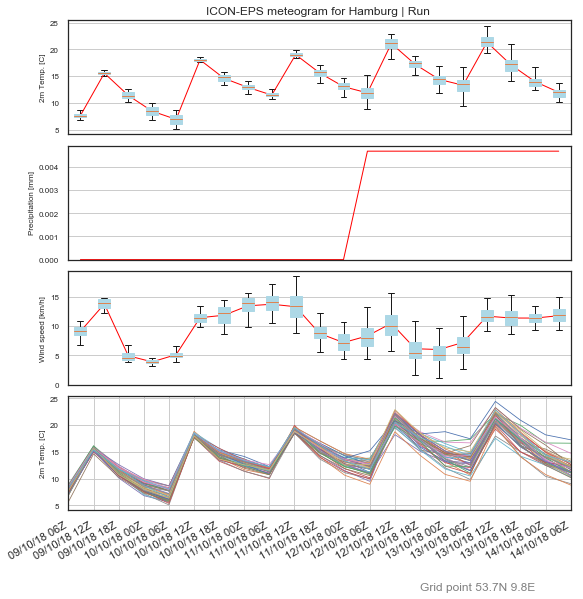

<Figure size 432x288 with 0 Axes>

In [66]:
nrows=4
ncols=1
sns.set(style="white")

for city_to_plot in cities:
    loc = geolocator.geocode(city)
    distance = np.sqrt((lats-loc.latitude)**2+(lons-loc.longitude)**2)
    ncell = np.argmin(distance)

    fig = plt.figure(1, figsize=(9,10))
    
    ax1=plt.subplot2grid((nrows,ncols), (0,0))
    ax1.set_title("ICON-EPS meteogram for "+city_to_plot+" | Run "+run)
    bplot=ax1.boxplot(t_2m_point[city_to_plot].T, patch_artist=True, showfliers=False)
    for box in bplot['boxes']:
        box.set(color='LightBlue')
        box.set(facecolor='LightBlue')

    xaxis=np.arange(1,np.shape(time)[0]+1,1)
    ax1.plot(xaxis, np.mean(t_2m_point[city_to_plot], axis=1), linewidth=1,color='red')
    ax1.set_ylabel("2m Temp. [C]",fontsize=8)
    ax1.yaxis.grid(True)
    ax1.tick_params(axis='y', which='major', labelsize=8)
    ax1.tick_params(axis='x', which='both', bottom=False)

    ax2=plt.subplot2grid((nrows,ncols), (1,0))
    bplot_rain=ax2.boxplot(tot_prec_point[city_to_plot].T, patch_artist=True, showfliers=False)
    for box in bplot_rain['boxes']:
        box.set(color='LightBlue')
        box.set(facecolor='LightBlue')
    ax2.plot(xaxis, np.mean(tot_prec_point[city_to_plot], axis=1), linewidth=1,color='red')
    ax2.set_ylim(bottom=0)
    ax2.yaxis.grid(True)
    ax2.set_ylabel("Precipitation [mm]",fontsize=8)
    ax2.tick_params(axis='y', which='major', labelsize=8)

    ax3=plt.subplot2grid((nrows,ncols), (2,0))
    bplot_wind=ax3.boxplot(wind_speed_10m_point[city_to_plot].T, patch_artist=True,showfliers=False)
    for box in bplot_wind['boxes']:
        box.set(color='LightBlue')
        box.set(facecolor='LightBlue')
    ax3.plot(xaxis, np.mean(wind_speed_10m_point[city_to_plot], axis=1), linewidth=1,color='red')
    ax3.yaxis.grid(True)
    ax3.set_ylabel("Wind speed [km/h]",fontsize=8)
    ax3.tick_params(axis='y', which='major', labelsize=8)
    ax3.set_ylim(bottom=0)
    
    ax4=plt.subplot2grid((nrows,ncols), (3,0))
    ax4.plot_date(time, t_2m_point[city_to_plot], '-',linewidth=0.8)
    ax4.set_xlim(time[0],time[-1])
    ax4.set_ylabel("2m Temp. [C]",fontsize=8)
    ax4.tick_params(axis='y', which='major', labelsize=8)
    ax4.yaxis.grid(True)
    ax4.xaxis.grid(True)
    ax4.xaxis.set_major_locator(mdates.HourLocator(interval=6))
    ax4.xaxis.set_major_formatter(DateFormatter('%d/%m/%y %HZ'))
    
    ax4.annotate('Grid point %3.1fN %3.1fE' % (lats[ncell], lons[ncell]), 
                 xy=(0.7, -0.7), xycoords='axes fraction', color="gray")
    fig.subplots_adjust(hspace=0.1)
    fig.autofmt_xdate()
    plt.savefig(diri_images+"meteogram_"+city_to_plot, dpi=150)
    plt.show()
    plt.clf()